## Deep NN for Classifier
build the model line by line

### Load Data -- Mar 15th data, 9 functional uses with 3 categories of pesticdes added (insect, fungi and herbicide)

In [1]:
import sys
sys.path.append("./src") # append to system path

import json
import pandas as pd
import numpy as np

import modeling_tool as mt
from make_training_data import data_sampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

import tensorflow as tf

#static parameters
BATCH_SIZE = 1
RUGULARIZATION = 0.

In [2]:
# load data
df = pd.read_csv('./data/descs/0315_10_functional_use_descs.csv',header=0)

# sample and split data
this_data = data_sampler()
this_data.sample_data(df, num_test_left=30)

trn_X = this_data.trn_data['descs']
trn_Y = this_data.trn_data['target']
N,M = trn_X.shape

tst_X = this_data.tst_data['descs']
tst_Y = this_data.tst_data['target']
N_tst, M_tst = tst_X.shape

target_names = np.unique(this_data.trn_data['class'])

from collections import Counter
print Counter(this_data.trn_data['class'])
print Counter(this_data.tst_data['class'])

Counter({'herbicides': 400, 'Fragrances': 400, 'insecticides': 400, 'Antibacterial': 400, 'fungicides': 260, 'Surfactants': 165, 'Solvents': 158, 'Flame Retardants': 116, 'Aerosol propellant': 38})
Counter({'herbicides': 30, 'fungicides': 30, 'Fragrances': 30, 'insecticides': 30, 'Flame Retardants': 30, 'Antibacterial': 30, 'Solvents': 30, 'Surfactants': 30, 'Aerosol propellant': 30})


### Data Preprocessing

In [3]:
this_scaler = StandardScaler()
trn_X = this_scaler.fit_transform(trn_X)
tst_X = this_scaler.transform(tst_X)

print trn_X

[[-0.46952616  3.03468293 -1.08864903 ...,  0.06949721 -0.19730828
  -0.33028586]
 [-0.67059461  1.8726785  -1.08864903 ..., -0.17809685 -0.31509775
  -0.05712202]
 [-0.60715721  1.1471793  -1.08864903 ..., -0.08073783 -0.27176221
  -0.24530155]
 ..., 
 [-0.39838827 -0.4202456  -0.04098684 ..., -0.24482135 -0.34231706
   0.4406432 ]
 [ 0.69153717  0.32786068  1.9046715  ...,  1.41028199  0.8896449
  -1.13763676]
 [ 0.44438799  0.35762669  0.85700931 ...,  0.84794972  0.34124804
  -1.07086338]]


### Build the model

In [4]:
def init_weights(shape):
    weights = tf.random_normal(shape,stddev = 0.1)
    return tf.Variable(weights)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

num_descs = trn_X.shape[1]
num_target = trn_Y.shape[1]

print num_descs,num_target

185 9


In [5]:
X = tf.placeholder(tf.float32,shape=[None,num_descs])
y = tf.placeholder(tf.float32,shape=[None,num_target])

#First layer
w1 = init_weights((num_descs,256)) 
b1 = bias_variable([256])
l1 = tf.add(tf.matmul(X,w1),b1)
l1 = tf.nn.relu(l1)

# Second layer
w2 = init_weights((256,256))
b2 = bias_variable([256])
l2 = tf.add(tf.matmul(l1,w2),b2)
l2 = tf.nn.relu(l2)

#Output layer
w_out = init_weights((256,num_target))
b_out = bias_variable([num_target])
l_out = tf.matmul(l2,w_out) + b_out

pred = tf.argmax(l_out,dimension=1)

In [6]:
#Define loss and optimizer 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=l_out,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate = 1e-4).minimize(cost)
# Initializing the variables
init = tf.global_variables_initializer()

Epoch = 1, Training Accuracy = 17.16%, Testing Accuracy = 11.11%
Epoch = 2, Training Accuracy = 17.37%, Testing Accuracy = 11.11%
Epoch = 3, Training Accuracy = 18.74%, Testing Accuracy = 12.96%
Epoch = 4, Training Accuracy = 20.58%, Testing Accuracy = 14.07%
Epoch = 5, Training Accuracy = 21.95%, Testing Accuracy = 18.52%
Epoch = 6, Training Accuracy = 25.03%, Testing Accuracy = 22.96%
Epoch = 7, Training Accuracy = 28.33%, Testing Accuracy = 26.67%
Epoch = 8, Training Accuracy = 31.28%, Testing Accuracy = 31.11%
Epoch = 9, Training Accuracy = 33.50%, Testing Accuracy = 35.56%
Epoch = 10, Training Accuracy = 34.62%, Testing Accuracy = 36.67%
Epoch = 11, Training Accuracy = 35.64%, Testing Accuracy = 37.78%
Epoch = 12, Training Accuracy = 37.95%, Testing Accuracy = 38.52%
Epoch = 13, Training Accuracy = 39.45%, Testing Accuracy = 42.22%
Epoch = 14, Training Accuracy = 41.29%, Testing Accuracy = 42.59%
Epoch = 15, Training Accuracy = 42.88%, Testing Accuracy = 45.93%
Epoch = 16, Trainin

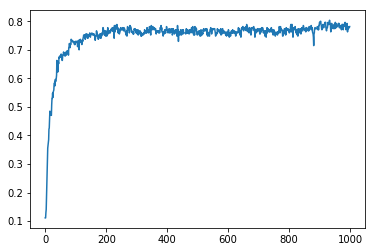

                    precision    recall  f1-score   support

Aerosol propellant       0.96      0.80      0.87        30
     Antibacterial       0.68      0.77      0.72        30
  Flame Retardants       1.00      0.97      0.98        30
        Fragrances       0.82      0.90      0.86        30
          Solvents       0.78      0.70      0.74        30
       Surfactants       0.86      0.83      0.85        30
        fungicides       0.59      0.43      0.50        30
        herbicides       0.68      0.77      0.72        30
      insecticides       0.70      0.87      0.78        30

       avg / total       0.78      0.78      0.78       270

[[24  0  0  0  3  0  1  1  1]
 [ 0 23  0  2  0  2  1  2  0]
 [ 0  1 29  0  0  0  0  0  0]
 [ 0  1  0 27  2  0  0  0  0]
 [ 1  3  0  1 21  2  0  0  2]
 [ 0  1  0  0  1 25  2  0  1]
 [ 0  4  0  2  0  0 13  6  5]
 [ 0  1  0  1  0  0  3 23  2]
 [ 0  0  0  0  0  0  2  2 26]]
Model saved in file: ./net/functional_use_classifier_nine_class_Ma

In [8]:
#Start Training
costs=[]
correct_prediction = tf.equal(tf.argmax(l_out,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#save the model
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1000):
        for i in range(0, len(trn_X),BATCH_SIZE):
            _, c = sess.run([optimizer,cost], feed_dict={X:trn_X[i:i+BATCH_SIZE], y:trn_Y[i:i+BATCH_SIZE]})
        trn_acc = accuracy.eval(feed_dict={X:trn_X,y:trn_Y})
        tst_acc = accuracy.eval(feed_dict={X:tst_X,y:tst_Y})                               
        costs.append(tst_acc)
        print("Epoch = %d, Training Accuracy = %.2f%%, Testing Accuracy = %.2f%%" % (epoch + 1, 100. * trn_acc, 100. * tst_acc))
    
    final_pred = sess.run(pred,feed_dict={X:tst_X,y:tst_Y})
    plt.plot(costs)
    plt.show()
    print classification_report(np.argmax(tst_Y,axis=1), final_pred,target_names=target_names)
    print confusion_matrix(np.argmax(tst_Y,axis=1), final_pred)
    
    save_path = saver.save(sess, "./net/functional_use_classifier_nine_class_Mar15.ckpt")
    print("Model saved in file: %s" % save_path)
        

### Output the Confusion Matrix and Performance matrix